In [79]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [80]:
appl=pd.read_csv(
    r'C:\Users\avand\OneDrive - The University of Western Ontario\udemy data science\stock_data\AAPL_2006-01-01_to_2018-01-01.csv', 
    parse_dates=['Date'],
    index_col= 'Date')

In [81]:
appl.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [82]:
def plotter(test, pred):
    plt.plot(test, color='red', label='Apple stock test data')
    plt.plot(pred, color='blue', label='Apple stock prediction')
    plt.title("Apple stock")
    plt.xlabel('Date')
    plt.ylabel('Price (close)')
    plt.legend()
    plt.show()
    
def MSE(test, pred):
    MSE=mean_squared_error(test, pred)
    print('The MSE is:', MSE)
    


In [83]:
training_set = appl[:'2016'].iloc[:,1:2].values
test_set = appl['2017':].iloc[:,1:2].values

In [84]:
print(training_set)

[[ 10.68]
 [ 10.85]
 [ 10.7 ]
 ...
 [118.02]
 [117.11]
 [117.2 ]]


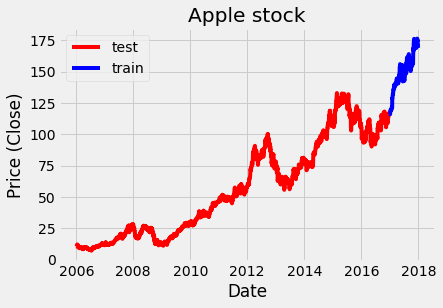

In [85]:
plt.plot(appl["Close"][:'2016'], color='red', label='test')
plt.plot(appl["Close"]['2017':], color='blue', label='train')
plt.title("Apple stock")
plt.xlabel('Date')
plt.ylabel('Price (Close)')
plt.legend()
plt.show()

In [86]:
scaler = MinMaxScaler()
scaled_data=scaler.fit_transform(training_set)

In [87]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
xtrain=[]
ytrain=[]

for i in range(60,len(training_set)):
    xtrain.append(scaled_data[i-60:i,0])
    ytrain.append(scaled_data[i,0])
    

xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [88]:
#reshape data
xtrain = np.reshape(xtrain, (xtrain.shape[0],xtrain.shape[1],1))

In [89]:
#LSTM architecture

# The LSTM architecture
regressor = Sequential()

# layer 1
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(xtrain.shape[1],1)))
regressor.add(Dropout(0.2))
# layer 2
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# layer 3
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# layer 4
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# output
regressor.add(Dense(units=1))

# compile RNN, MSE loss, rmsprop optimizer
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(xtrain,ytrain,epochs=50,batch_size=32)


Epoch 1/50
2708/2708 [==============================] - 32s 12ms/step - loss: 0.0171
Epoch 2/50
2708/2708 [==============================] - 23s 9ms/step - loss: 0.0075
Epoch 3/50
2708/2708 [==============================] - 26s 9ms/step - loss: 0.0057
Epoch 4/50
2708/2708 [==============================] - 24s 9ms/step - loss: 0.0049
Epoch 5/50
2708/2708 [==============================] - 29s 11ms/step - loss: 0.0047
Epoch 6/50
2708/2708 [==============================] - 27s 10ms/step - loss: 0.0041
Epoch 7/50
2708/2708 [==============================] - 24s 9ms/step - loss: 0.0036
Epoch 8/50
2708/2708 [==============================] - 29s 11ms/step - loss: 0.0034
Epoch 9/50
2708/2708 [==============================] - 31s 11ms/step - loss: 0.0033
Epoch 10/50
2708/2708 [==============================] - 28s 10ms/step - loss: 0.0033
Epoch 11/50
2708/2708 [==============================] - 23s 8ms/step - loss: 0.0029
Epoch 12/50
2708/2708 [==============================] - 28s 10ms/st

In [92]:
# get first 60 values before the test set, since we need 60 data points to predict next group.
dataset_total = pd.concat((appl["High"][:'2016'],appl["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [93]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

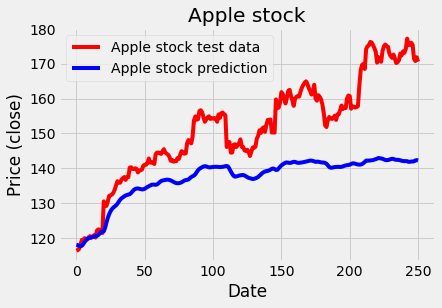

In [95]:
# Visualizing the results for LSTM
plotter(test_set,predicted_stock_price)

In [97]:
# Evaluating our model
MSE(test_set,predicted_stock_price)

The MSE is: 291.2982970640239


# GRU NN

In [98]:
# The GRU architecture
regressorGRU = Sequential()

# layer 1
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(xtrain.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

# layer 2
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(xtrain.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

# layer 3
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(xtrain.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

# layer 4
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Output layer
regressorGRU.add(Dense(units=1))

# RNN compiler
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')

# Fitting to the training set
regressorGRU.fit(xtrain,ytrain,epochs=50,batch_size=150)

Epoch 1/50
2708/2708 [==============================] - 14s 5ms/step - loss: 0.1126
Epoch 2/50
2708/2708 [==============================] - 13s 5ms/step - loss: 0.0467
Epoch 3/50
2708/2708 [==============================] - 14s 5ms/step - loss: 0.0105
Epoch 4/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0048
Epoch 5/50
2708/2708 [==============================] - 13s 5ms/step - loss: 0.0038
Epoch 6/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0037
Epoch 7/50
2708/2708 [==============================] - 9s 3ms/step - loss: 0.0032
Epoch 8/50
2708/2708 [==============================] - 9s 3ms/step - loss: 0.0032
Epoch 9/50
2708/2708 [==============================] - 15s 6ms/step - loss: 0.0030
Epoch 10/50
2708/2708 [==============================] - 12s 4ms/step - loss: 0.0030
Epoch 11/50
2708/2708 [==============================] - 8s 3ms/step - loss: 0.0030
Epoch 12/50
2708/2708 [==============================] - 9s 3ms/step - loss: 

In [100]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = scaler.inverse_transform(GRU_predicted_stock_price)

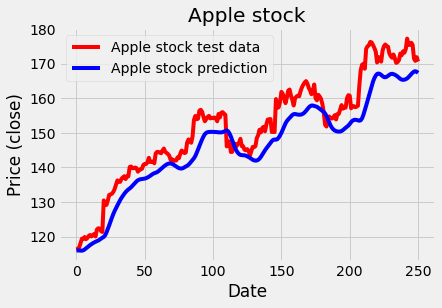

In [102]:
# Visualizing the results for GRU
plotter(test_set,GRU_predicted_stock_price)

In [104]:
# Evaluating GRU
MSE(test_set,GRU_predicted_stock_price)

The MSE is: 38.56945370089951
